In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf


In [2]:
sns.set_theme()

In [4]:
model = tf.keras.models.load_model("D:\Anshul\Code\IMD\Forecast Model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (None, 4, 11)             23        
 ributed)                                                        
                                                                 
 lstm (LSTM)                 (None, 4, 50)             12400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 7)                 357       
                                                                 
Total params: 32980 (128.83 KB)
Trainable params: 32957 (128.74 KB)
Non-trainable params: 23 (96.00 Byte)
_________________________________________________________________


In [37]:
file = "D:\Anshul\Code\IMD\Data\Shivajinagar\Shivajinagar Cleaned Data.csv"
df1 = pd.read_csv(file)
df1.rename(columns = {'Unnamed: 0':'Timestamp'}, inplace = True)
df1.index = pd.to_datetime(df1['Timestamp'])
df1 = df1.iloc[:, :8]
df1

,Timestamp,RAIN_DAILY(mm),TEMP(C),DEW_POINT(C),RH(%),WIND_SPEED_10m(kt),SLP(hPa),MSLP(hPa)
Timestamp,,,,,,,,
2020-01-01 02:15:00,2020-01-01 02:15:00,0.0,11.9,11.5,98.0,0.0,950.7,1015.9
2020-01-01 02:30:00,2020-01-01 02:30:00,0.0,12.4,12.0,98.0,0.0,951.0,1016.1
2020-01-01 02:45:00,2020-01-01 02:45:00,0.0,13.7,13.3,98.0,1.0,951.2,1016.1
2020-01-01 03:00:00,2020-01-01 03:00:00,0.0,15.0,14.3,96.0,1.0,951.5,1016.1
2020-01-01 03:15:00,2020-01-01 03:15:00,0.0,16.7,13.8,83.0,1.0,951.9,1016.1
...,...,...,...,...,...,...,...,...
2024-07-12 04:00:00,2024-07-12 04:00:00,0.0,26.8,24.6,88.0,4.0,943.0,1004.4
2024-07-12 04:15:00,2024-07-12 04:15:00,0.0,27.7,24.5,83.0,6.0,943.0,1004.2
2024-07-12 04:30:00,2024-07-12 04:30:00,0.0,27.5,24.3,83.0,5.0,943.0,1004.2


In [38]:
obs_df = pd.read_csv("D:\Anshul\Code\IMD\Data\Shivajinagar\Observed Data.csv")
obs_df.columns
obs_df.index = pd.to_datetime(obs_df['DATE(YYYY-MM-DD)'] + " " + obs_df['TIME (UTC)'])
t = ['Unnamed: 0', 'S NO.', 'DISTRICT', 'STATION', 'DATE(YYYY-MM-DD)', 'TIME (UTC)', "TEMP DAY MIN. ('C)", "TEMP DAY MAX. ('C)", 'RH DAY MIN MAX (%)', 'WIND DIR 10 m (Deg)', 'WIND SPEED MAX / GUST 10 m (Kt)', 'SUN SHINE (HH.MM)', 'BATTERY (Volts)', 'GPS']
obs_df = obs_df.drop(columns=t)
obs_df.insert(2, 'DEW_POINT(C)', 0)
obs_df

,RAIN FALL CUM. SINCE 0300 UTC (mm),TEMP. ('C),DEW_POINT(C),RH (%),WIND SPEED 10 m (Kt),SLP (hPa),MSLP (hPa / gpm)
2024-07-12 00:00:00,2.5,25.3,0,89,3,941.0,1002.6
2024-07-12 00:15:00,2.5,25.2,0,89,2,941.0,1002.6
2024-07-12 00:30:00,2.5,25.0,0,89,2,941.2,1002.9
2024-07-12 00:45:00,2.5,24.9,0,90,3,941.4,1003.1
2024-07-12 01:00:00,2.5,24.9,0,91,2,941.5,1003.2
...,...,...,...,...,...,...,...
2024-07-17 04:30:00,0.0,27.2,0,78,4,941.7,1002.9
2024-07-17 04:45:00,0.0,27.2,0,77,7,941.7,1002.9
2024-07-17 05:00:00,0.0,26.7,0,80,5,942.0,1003.3
2024-07-17 05:15:00,0.0,27.2,0,80,5,942.0,1003.2


In [39]:
obs_df.columns = df1.columns[1:].values
obs_df

,RAIN_DAILY(mm),TEMP(C),DEW_POINT(C),RH(%),WIND_SPEED_10m(kt),SLP(hPa),MSLP(hPa)
2024-07-12 00:00:00,2.5,25.3,0,89,3,941.0,1002.6
2024-07-12 00:15:00,2.5,25.2,0,89,2,941.0,1002.6
2024-07-12 00:30:00,2.5,25.0,0,89,2,941.2,1002.9
2024-07-12 00:45:00,2.5,24.9,0,90,3,941.4,1003.1
2024-07-12 01:00:00,2.5,24.9,0,91,2,941.5,1003.2
...,...,...,...,...,...,...,...
2024-07-17 04:30:00,0.0,27.2,0,78,4,941.7,1002.9
2024-07-17 04:45:00,0.0,27.2,0,77,7,941.7,1002.9
2024-07-17 05:00:00,0.0,26.7,0,80,5,942.0,1003.3
2024-07-17 05:15:00,0.0,27.2,0,80,5,942.0,1003.2


In [45]:
day = 24*60*60
year = (365.2425)*day
seconds = (obs_df.index - obs_df.index[0]).total_seconds() 
obs_df['Day sin'] = np.sin(seconds * (2 * np.pi / day))
obs_df['Day cos'] = np.cos(seconds * (2 * np.pi / day))
obs_df['Year sin'] = np.sin(seconds * (2 * np.pi / year))
obs_df['Year cos'] = np.cos(seconds * (2 * np.pi / year))
obs_df = obs_df[obs_df.index > datetime.datetime(2024, 7, 12, 5)]
obs_df

,RAIN_DAILY(mm),TEMP(C),DEW_POINT(C),RH(%),WIND_SPEED_10m(kt),SLP(hPa),MSLP(hPa),Day sin,Day cos,Year sin,Year cos
2024-07-12 05:15:00,1.5,24.5,0,89,13,943.4,1005.3,0.980785,1.950903e-01,0.003763,0.999993
2024-07-12 05:30:00,3.0,24.3,0,92,6,943.4,1005.4,0.991445,1.305262e-01,0.003942,0.999992
2024-07-12 05:45:00,3.5,24.6,0,92,3,943.2,1005.1,0.997859,6.540313e-02,0.004121,0.999992
2024-07-12 06:00:00,4.0,25.2,0,93,3,943.2,1004.9,1.000000,6.123234e-17,0.004301,0.999991
2024-07-12 06:15:00,4.0,25.2,0,92,6,943.0,1004.7,0.997859,-6.540313e-02,0.004480,0.999990
...,...,...,...,...,...,...,...,...,...,...,...
2024-07-17 04:30:00,0.0,27.2,0,78,4,941.7,1002.9,0.923880,3.826834e-01,0.089121,0.996021
2024-07-17 04:45:00,0.0,27.2,0,77,7,941.7,1002.9,0.946930,3.214395e-01,0.089299,0.996005
2024-07-17 05:00:00,0.0,26.7,0,80,5,942.0,1003.3,0.965926,2.588190e-01,0.089478,0.995989
2024-07-17 05:15:00,0.0,27.2,0,80,5,942.0,1003.2,0.980785,1.950903e-01,0.089656,0.995973


In [46]:
df = pd.concat([df1, obs_df])
df

,Timestamp,RAIN_DAILY(mm),TEMP(C),DEW_POINT(C),RH(%),WIND_SPEED_10m(kt),SLP(hPa),MSLP(hPa),Day sin,Day cos,Year sin,Year cos
2020-01-01 02:15:00,2020-01-01 02:15:00,0.0,11.9,11.5,98.0,0.0,950.7,1015.9,NaN,NaN,NaN,NaN
2020-01-01 02:30:00,2020-01-01 02:30:00,0.0,12.4,12.0,98.0,0.0,951.0,1016.1,NaN,NaN,NaN,NaN
2020-01-01 02:45:00,2020-01-01 02:45:00,0.0,13.7,13.3,98.0,1.0,951.2,1016.1,NaN,NaN,NaN,NaN
2020-01-01 03:00:00,2020-01-01 03:00:00,0.0,15.0,14.3,96.0,1.0,951.5,1016.1,NaN,NaN,NaN,NaN
2020-01-01 03:15:00,2020-01-01 03:15:00,0.0,16.7,13.8,83.0,1.0,951.9,1016.1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-17 04:30:00,NaN,0.0,27.2,0.0,78.0,4.0,941.7,1002.9,0.923880,0.382683,0.089121,0.996021
2024-07-17 04:45:00,NaN,0.0,27.2,0.0,77.0,7.0,941.7,1002.9,0.946930,0.321439,0.089299,0.996005
2024-07-17 05:00:00,NaN,0.0,26.7,0.0,80.0,5.0,942.0,1003.3,0.965926,0.258819,0.089478,0.995989
2024-07-17 05:15:00,NaN,0.0,27.2,0.0,80.0,5.0,942.0,1003.2,0.980785,0.195090,0.089656,0.995973


In [49]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 1:8].values
generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(X, y, 4, batch_size=32)

In [54]:
predictions = pd.DataFrame(model.predict(generator), columns=df.columns[1:8])
predictions.index = pd.to_datetime(df.index[4:])
predictions

4589/4589 [==============================] - 18s 4ms/step


,RAIN_DAILY(mm),TEMP(C),DEW_POINT(C),RH(%),WIND_SPEED_10m(kt),SLP(hPa),MSLP(hPa)
2020-01-01 03:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 03:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 03:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2024-07-17 04:30:00,-0.826338,21.694176,10.695934,50.009277,1.015357,937.052795,999.425415
2024-07-17 04:45:00,-0.815467,21.483246,10.789653,50.753944,0.984443,937.099548,999.523865
2024-07-17 05:00:00,-0.819103,21.764729,10.780714,50.047958,1.048847,937.774353,1000.189941
2024-07-17 05:15:00,-0.494265,21.038555,11.090355,52.910400,0.946896,937.700806,1000.240784


In [59]:
test_predictions = predictions[predictions.index > datetime.datetime(2024, 7, 12, 5)]
df_ = df[df.index > datetime.datetime(2024, 7, 12, 5)]

In [67]:
from sklearn.metrics import accuracy_score, r2_score, root_mean_squared_error, mean_absolute_error, mean_squared_error

{'RAIN_DAILY(mm)': {'R2': 0.3424369888117085, 'MSE': 32.77848818441631, 'RMSE': 5.725250054313463, 'MAE': 3.976548419069888}}


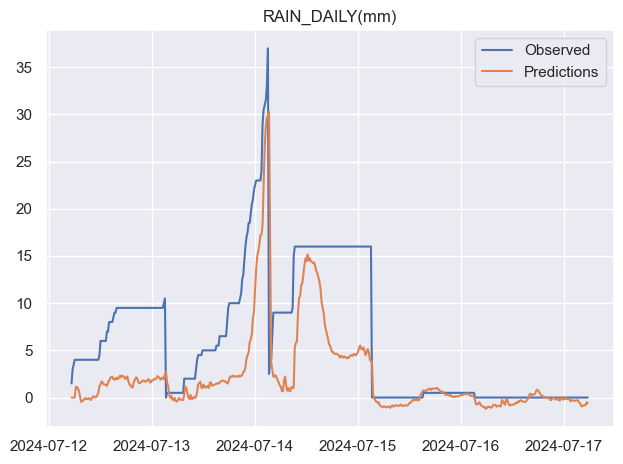

{'RAIN_DAILY(mm)': {'R2': 0.3424369888117085, 'MSE': 32.77848818441631, 'RMSE': 5.725250054313463, 'MAE': 3.976548419069888}, 'TEMP(C)': {'R2': -11.102660368253709, 'MSE': 36.04455080961107, 'RMSE': 6.003711419581313, 'MAE': 5.635145807164565}}


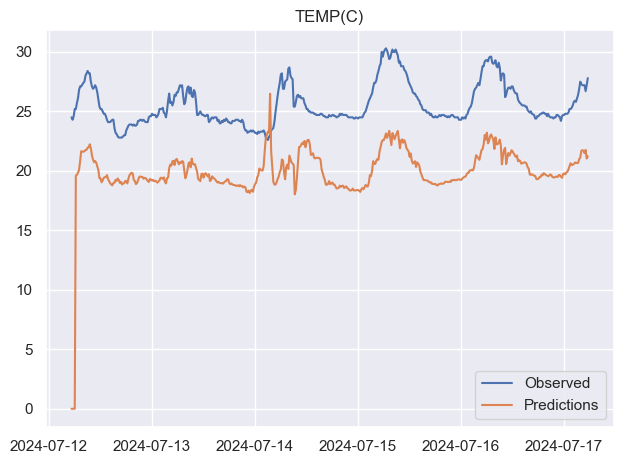

{'RAIN_DAILY(mm)': {'R2': 0.3424369888117085, 'MSE': 32.77848818441631, 'RMSE': 5.725250054313463, 'MAE': 3.976548419069888}, 'TEMP(C)': {'R2': -11.102660368253709, 'MSE': 36.04455080961107, 'RMSE': 6.003711419581313, 'MAE': 5.635145807164565}, 'DEW_POINT(C)': {'R2': 0.0, 'MSE': 150.1405425518975, 'RMSE': 12.25318499623251, 'MAE': 12.114440346577528}}


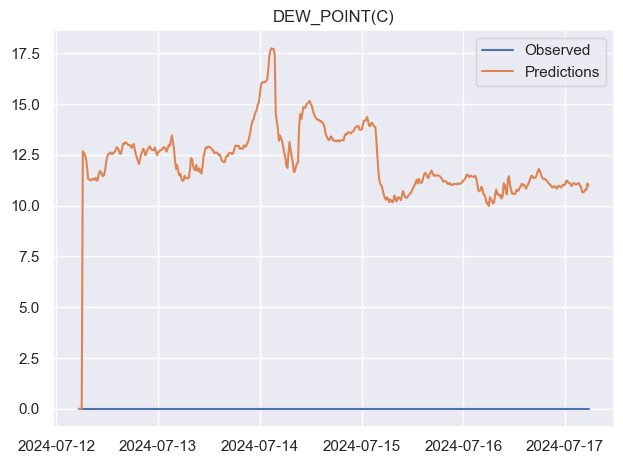

{'RAIN_DAILY(mm)': {'R2': 0.3424369888117085, 'MSE': 32.77848818441631, 'RMSE': 5.725250054313463, 'MAE': 3.976548419069888}, 'TEMP(C)': {'R2': -11.102660368253709, 'MSE': 36.04455080961107, 'RMSE': 6.003711419581313, 'MAE': 5.635145807164565}, 'DEW_POINT(C)': {'R2': 0.0, 'MSE': 150.1405425518975, 'RMSE': 12.25318499623251, 'MAE': 12.114440346577528}, 'RH(%)': {'R2': -16.963520183205542, 'MSE': 782.8996686568121, 'RMSE': 27.980344326988046, 'MAE': 26.937695135185713}}


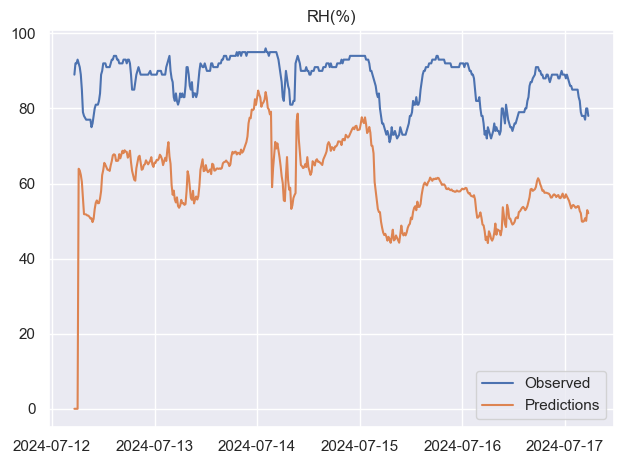

{'RAIN_DAILY(mm)': {'R2': 0.3424369888117085, 'MSE': 32.77848818441631, 'RMSE': 5.725250054313463, 'MAE': 3.976548419069888}, 'TEMP(C)': {'R2': -11.102660368253709, 'MSE': 36.04455080961107, 'RMSE': 6.003711419581313, 'MAE': 5.635145807164565}, 'DEW_POINT(C)': {'R2': 0.0, 'MSE': 150.1405425518975, 'RMSE': 12.25318499623251, 'MAE': 12.114440346577528}, 'RH(%)': {'R2': -16.963520183205542, 'MSE': 782.8996686568121, 'RMSE': 27.980344326988046, 'MAE': 26.937695135185713}, 'WIND_SPEED_10m(kt)': {'R2': -2.282193830468629, 'MSE': 17.720841452523754, 'RMSE': 4.209612981323076, 'MAE': 3.544438011356508}}


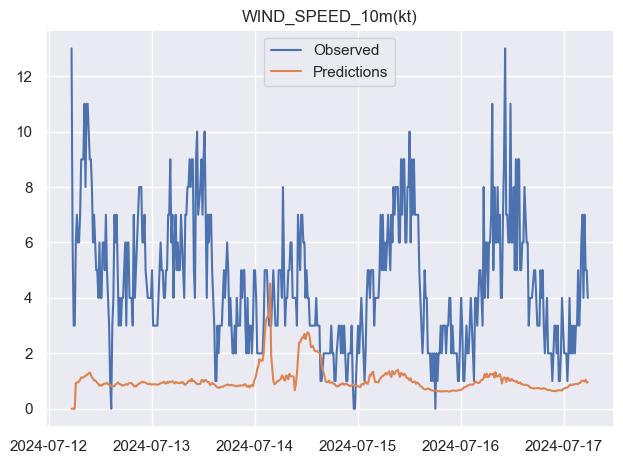

{'RAIN_DAILY(mm)': {'R2': 0.3424369888117085, 'MSE': 32.77848818441631, 'RMSE': 5.725250054313463, 'MAE': 3.976548419069888}, 'TEMP(C)': {'R2': -11.102660368253709, 'MSE': 36.04455080961107, 'RMSE': 6.003711419581313, 'MAE': 5.635145807164565}, 'DEW_POINT(C)': {'R2': 0.0, 'MSE': 150.1405425518975, 'RMSE': 12.25318499623251, 'MAE': 12.114440346577528}, 'RH(%)': {'R2': -16.963520183205542, 'MSE': 782.8996686568121, 'RMSE': 27.980344326988046, 'MAE': 26.937695135185713}, 'WIND_SPEED_10m(kt)': {'R2': -2.282193830468629, 'MSE': 17.720841452523754, 'RMSE': 4.209612981323076, 'MAE': 3.544438011356508}, 'SLP(hPa)': {'R2': -3265.7044284901417, 'MSE': 7618.085537394453, 'RMSE': 87.28164490541212, 'MAE': 12.430103215784923}}


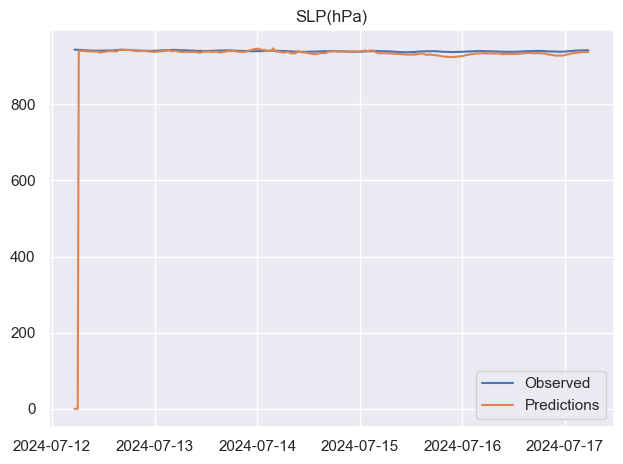

{'RAIN_DAILY(mm)': {'R2': 0.3424369888117085, 'MSE': 32.77848818441631, 'RMSE': 5.725250054313463, 'MAE': 3.976548419069888}, 'TEMP(C)': {'R2': -11.102660368253709, 'MSE': 36.04455080961107, 'RMSE': 6.003711419581313, 'MAE': 5.635145807164565}, 'DEW_POINT(C)': {'R2': 0.0, 'MSE': 150.1405425518975, 'RMSE': 12.25318499623251, 'MAE': 12.114440346577528}, 'RH(%)': {'R2': -16.963520183205542, 'MSE': 782.8996686568121, 'RMSE': 27.980344326988046, 'MAE': 26.937695135185713}, 'WIND_SPEED_10m(kt)': {'R2': -2.282193830468629, 'MSE': 17.720841452523754, 'RMSE': 4.209612981323076, 'MAE': 3.544438011356508}, 'SLP(hPa)': {'R2': -3265.7044284901417, 'MSE': 7618.085537394453, 'RMSE': 87.28164490541212, 'MAE': 12.430103215784923}, 'MSLP(hPa)': {'R2': -2806.2077094462725, 'MSE': 8640.676988495914, 'RMSE': 92.95524185593793, 'MAE': 12.325172382021261}}


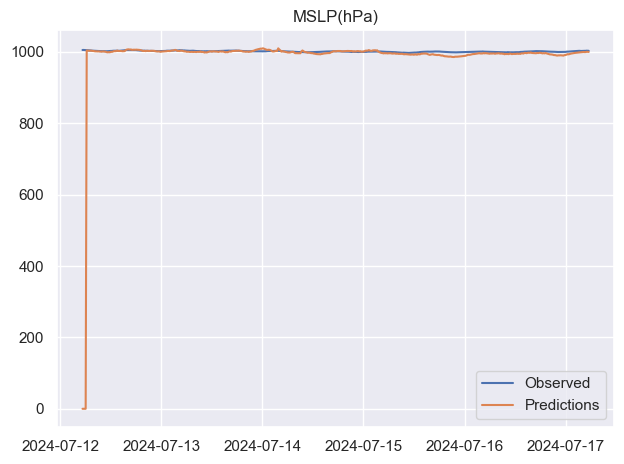

In [72]:
metrics = {}
for col in predictions.columns:
    m = {
        "R2" : r2_score(df_[col], test_predictions[col]),
        "MSE" : mean_squared_error(df_[col], test_predictions[col]),
        "RMSE" : root_mean_squared_error(df_[col], test_predictions[col]),
        "MAE" : mean_absolute_error(df_[col], test_predictions[col])
    }
    metrics[col] = m
    print(metrics)
    plt.plot(df_[col], label='Observed')
    plt.plot(test_predictions[col], label='Predictions')
    plt.legend()
    plt.title(f'{col}')
    plt.tight_layout()
    plt.show()

In [74]:
pd.DataFrame(metrics)

,RAIN_DAILY(mm),TEMP(C),DEW_POINT(C),RH(%),WIND_SPEED_10m(kt),SLP(hPa),MSLP(hPa)
R2,0.342437,-11.102660,0.000000,-16.963520,-2.282194,-3265.704428,-2806.207709
MSE,32.778488,36.044551,150.140543,782.899669,17.720841,7618.085537,8640.676988
RMSE,5.725250,6.003711,12.253185,27.980344,4.209613,87.281645,92.955242
MAE,3.976548,5.635146,12.114440,26.937695,3.544438,12.430103,12.325172


In [76]:
metric_df = pd.DataFrame(metrics)
metric_df.drop(columns = ['DEW_POINT(C)'])

,RAIN_DAILY(mm),TEMP(C),RH(%),WIND_SPEED_10m(kt),SLP(hPa),MSLP(hPa)
R2,0.342437,-11.102660,-16.963520,-2.282194,-3265.704428,-2806.207709
MSE,32.778488,36.044551,782.899669,17.720841,7618.085537,8640.676988
RMSE,5.725250,6.003711,27.980344,4.209613,87.281645,92.955242
MAE,3.976548,5.635146,26.937695,3.544438,12.430103,12.325172
